In [39]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import pandas as pd
%matplotlib inline
import numpy as np
import re
from datetime import datetime
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [8]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [9]:

df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Scrape_efsyn.csv") 
df

,Title,Summary,Time
0,"Τους ψήφισαν, τους επέτρεψαν, είναι καιρός να ...",Εδώ και λίγες μέρες με τις ψήφους μόνο της Ν....,"08.07.2021, 16:00"
1,"Τώρα και για τους εκπαιδευτικούς, μόρια αντί γ...",Τη λειτουργία «εκπαιδευτικών ομίλων» μετά τη ...,"05.07.2021, 10:27"
2,Οι κρίσεις και το δόγμα του ατομισμού,Σκεφτείτε τι θα γινόταν αν ο καύσωνας της προ...,"05.07.2021, 04:00"
3,Το ασφαλιστικό των millennials,Είναι αναγκαίο να υπάρξει αλλαγή υποδείγματος...,"04.07.2021, 10:26"
4,Της Αλλοπάρ*,"Οι συλλεκτικές, διασκεδαστικές και, γενικά, α...","03.07.2021, 06:00"
...,...,...,...
295,Ηλιόπουλος: Επικίνδυνη η Ν.Δ. – κεντρική η μάχ...,Ο εκπρόσωπος Τύπου του ΣΥΡΙΖΑ-ΠΣ εστίασε στο ...,"17.04.2021, 17:25"
296,Βαρουφάκης: Το εργασιακό νομοσχέδιο του Κ. Χατ...,Κριτική στο νομοσχέδιο του Κ. Χατζηδάκη που θ...,"17.04.2021, 17:00"
297,ΣΥΡΙΖΑ: Η κυβέρνηση Μητσοτάκη οδηγεί σε ανεξέλ...,«Η κυβέρνηση έχει κηρύξει πόλεμο στους εργαζο...,"16.04.2021, 12:39"
298,Πώς έγινε... άνθρακες ο «χρυσός» του Πρίνου;,Σε δεινή θέση βρίσκεται η εταιρεία Energean K...,"16.04.2021, 12:13"


In [10]:
df['Time'] = pd.to_datetime(df.Time , format='%d.%m.%Y, %H:%M')
df['Time']
df

,Title,Summary,Time
0,"Τους ψήφισαν, τους επέτρεψαν, είναι καιρός να ...",Εδώ και λίγες μέρες με τις ψήφους μόνο της Ν....,2021-07-08 16:00:00
1,"Τώρα και για τους εκπαιδευτικούς, μόρια αντί γ...",Τη λειτουργία «εκπαιδευτικών ομίλων» μετά τη ...,2021-07-05 10:27:00
2,Οι κρίσεις και το δόγμα του ατομισμού,Σκεφτείτε τι θα γινόταν αν ο καύσωνας της προ...,2021-07-05 04:00:00
3,Το ασφαλιστικό των millennials,Είναι αναγκαίο να υπάρξει αλλαγή υποδείγματος...,2021-07-04 10:26:00
4,Της Αλλοπάρ*,"Οι συλλεκτικές, διασκεδαστικές και, γενικά, α...",2021-07-03 06:00:00
...,...,...,...
295,Ηλιόπουλος: Επικίνδυνη η Ν.Δ. – κεντρική η μάχ...,Ο εκπρόσωπος Τύπου του ΣΥΡΙΖΑ-ΠΣ εστίασε στο ...,2021-04-17 17:25:00
296,Βαρουφάκης: Το εργασιακό νομοσχέδιο του Κ. Χατ...,Κριτική στο νομοσχέδιο του Κ. Χατζηδάκη που θ...,2021-04-17 17:00:00
297,ΣΥΡΙΖΑ: Η κυβέρνηση Μητσοτάκη οδηγεί σε ανεξέλ...,«Η κυβέρνηση έχει κηρύξει πόλεμο στους εργαζο...,2021-04-16 12:39:00
298,Πώς έγινε... άνθρακες ο «χρυσός» του Πρίνου;,Σε δεινή θέση βρίσκεται η εταιρεία Energean K...,2021-04-16 12:13:00


In [11]:
df['year'] = pd.DatetimeIndex(df['Time']).year
df['month'] = pd.DatetimeIndex(df['Time']).month
df['day'] = pd.DatetimeIndex(df['Time']).day
df

,Title,Summary,Time,year,month,day
0,"Τους ψήφισαν, τους επέτρεψαν, είναι καιρός να ...",Εδώ και λίγες μέρες με τις ψήφους μόνο της Ν....,2021-07-08 16:00:00,2021,7,8
1,"Τώρα και για τους εκπαιδευτικούς, μόρια αντί γ...",Τη λειτουργία «εκπαιδευτικών ομίλων» μετά τη ...,2021-07-05 10:27:00,2021,7,5
2,Οι κρίσεις και το δόγμα του ατομισμού,Σκεφτείτε τι θα γινόταν αν ο καύσωνας της προ...,2021-07-05 04:00:00,2021,7,5
3,Το ασφαλιστικό των millennials,Είναι αναγκαίο να υπάρξει αλλαγή υποδείγματος...,2021-07-04 10:26:00,2021,7,4
4,Της Αλλοπάρ*,"Οι συλλεκτικές, διασκεδαστικές και, γενικά, α...",2021-07-03 06:00:00,2021,7,3
...,...,...,...,...,...,...
295,Ηλιόπουλος: Επικίνδυνη η Ν.Δ. – κεντρική η μάχ...,Ο εκπρόσωπος Τύπου του ΣΥΡΙΖΑ-ΠΣ εστίασε στο ...,2021-04-17 17:25:00,2021,4,17
296,Βαρουφάκης: Το εργασιακό νομοσχέδιο του Κ. Χατ...,Κριτική στο νομοσχέδιο του Κ. Χατζηδάκη που θ...,2021-04-17 17:00:00,2021,4,17
297,ΣΥΡΙΖΑ: Η κυβέρνηση Μητσοτάκη οδηγεί σε ανεξέλ...,«Η κυβέρνηση έχει κηρύξει πόλεμο στους εργαζο...,2021-04-16 12:39:00,2021,4,16
298,Πώς έγινε... άνθρακες ο «χρυσός» του Πρίνου;,Σε δεινή θέση βρίσκεται η εταιρεία Energean K...,2021-04-16 12:13:00,2021,4,16


In [12]:
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)


In [13]:
df.dtypes

Title              object
Summary            object
Time       datetime64[ns]
year                int64
month              object
day                 int64
dtype: object

In [14]:
def cleanTxt(text):
  text = re.sub(r'[^\w\s]', '', text)   #Removing puncuations
  text = text.lower()                     #Converting letters to lowercase
  text = text.replace('\xa0','')       #Removing \xa0 character(it means space)  
  text = text.replace('\t','')        #Removing \t character(similar to the indentation function in the document,Tab key) 
  text = text.replace('\n','')                                                                                          
  #text = re.sub('\d+', '', text)      #Removing numbers             
# Return the cleaned text
  return text
#Clean the tweets
df['Summary'] = df['Summary'].apply(cleanTxt)
df['Title'] =  df['Title'].apply(cleanTxt)
#Show the cleaned tweets
df

,Title,Summary,Time,year,month,day
0,τους ψήφισαν τους επέτρεψαν είναι καιρός να αν...,εδώ και λίγες μέρες με τις ψήφους μόνο της νδ...,2021-07-08 16:00:00,2021,Jul,8
1,τώρα και για τους εκπαιδευτικούς μόρια αντί γι...,τη λειτουργία εκπαιδευτικών ομίλων μετά τη λή...,2021-07-05 10:27:00,2021,Jul,5
2,οι κρίσεις και το δόγμα του ατομισμού,σκεφτείτε τι θα γινόταν αν ο καύσωνας της προ...,2021-07-05 04:00:00,2021,Jul,5
3,το ασφαλιστικό των millennials,είναι αναγκαίο να υπάρξει αλλαγή υποδείγματος...,2021-07-04 10:26:00,2021,Jul,4
4,της αλλοπάρ,οι συλλεκτικές διασκεδαστικές και γενικά απολ...,2021-07-03 06:00:00,2021,Jul,3
...,...,...,...,...,...,...
295,ηλιόπουλος επικίνδυνη η νδ κεντρική η μάχη για...,ο εκπρόσωποςτύπου του συριζαπς εστίασε στο θέ...,2021-04-17 17:25:00,2021,Apr,17
296,βαρουφάκης το εργασιακό νομοσχέδιο του κ χατζη...,κριτική στο νομοσχέδιο του κ χατζηδάκη που θί...,2021-04-17 17:00:00,2021,Apr,17
297,συριζα η κυβέρνηση μητσοτάκη οδηγεί σε ανεξέλε...,η κυβέρνηση έχει κηρύξει πόλεμο στους εργαζομ...,2021-04-16 12:39:00,2021,Apr,16
298,πώς έγινε άνθρακες ο χρυσός του πρίνου,σε δεινή θέση βρίσκεται η εταιρεία energean k...,2021-04-16 12:13:00,2021,Apr,16


In [15]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [16]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [17]:
matrix = vec.fit_transform(df['Summary'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation(προσδοκία) words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']



In [20]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)


df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [21]:
#We don't have NaN values...
df.isnull().values.any()

False

In [22]:
df.set_index('Time' , inplace=True)
df



,Title,Summary,year,month,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Time,,,,,,,,,,,,,,,
2021-07-08 16:00:00,τους ψήφισαν τους επέτρεψαν είναι καιρός να αν...,εδώ και λίγες μέρες με τις ψήφους μόνο της νδ...,2021,Jul,8,0,0,0,0,0,0,0,0,0,0
2021-07-05 10:27:00,τώρα και για τους εκπαιδευτικούς μόρια αντί γι...,τη λειτουργία εκπαιδευτικών ομίλων μετά τη λή...,2021,Jul,5,0,0,0,0,0,1,0,1,1,1
2021-07-05 04:00:00,οι κρίσεις και το δόγμα του ατομισμού,σκεφτείτε τι θα γινόταν αν ο καύσωνας της προ...,2021,Jul,5,0,0,0,0,0,0,0,0,0,0
2021-07-04 10:26:00,το ασφαλιστικό των millennials,είναι αναγκαίο να υπάρξει αλλαγή υποδείγματος...,2021,Jul,4,0,0,0,0,0,0,1,0,0,1
2021-07-03 06:00:00,της αλλοπάρ,οι συλλεκτικές διασκεδαστικές και γενικά απολ...,2021,Jul,3,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-17 17:25:00,ηλιόπουλος επικίνδυνη η νδ κεντρική η μάχη για...,ο εκπρόσωποςτύπου του συριζαπς εστίασε στο θέ...,2021,Apr,17,0,1,0,0,0,1,0,1,3,1
2021-04-17 17:00:00,βαρουφάκης το εργασιακό νομοσχέδιο του κ χατζη...,κριτική στο νομοσχέδιο του κ χατζηδάκη που θί...,2021,Apr,17,2,0,0,0,0,1,0,1,2,0
2021-04-16 12:39:00,συριζα η κυβέρνηση μητσοτάκη οδηγεί σε ανεξέλε...,η κυβέρνηση έχει κηρύξει πόλεμο στους εργαζομ...,2021,Apr,16,0,1,0,1,0,1,0,0,2,1


In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/efsyn_new_sent.csv' )
df

,Title,Summary,year,month,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Time,,,,,,,,,,,,,,,
2021-07-08 16:00:00,τους ψήφισαν τους επέτρεψαν είναι καιρός να αν...,εδώ και λίγες μέρες με τις ψήφους μόνο της νδ...,2021,Jul,8,0,0,0,0,0,0,0,0,0,0
2021-07-05 10:27:00,τώρα και για τους εκπαιδευτικούς μόρια αντί γι...,τη λειτουργία εκπαιδευτικών ομίλων μετά τη λή...,2021,Jul,5,0,0,0,0,0,1,0,1,1,1
2021-07-05 04:00:00,οι κρίσεις και το δόγμα του ατομισμού,σκεφτείτε τι θα γινόταν αν ο καύσωνας της προ...,2021,Jul,5,0,0,0,0,0,0,0,0,0,0
2021-07-04 10:26:00,το ασφαλιστικό των millennials,είναι αναγκαίο να υπάρξει αλλαγή υποδείγματος...,2021,Jul,4,0,0,0,0,0,0,1,0,0,1
2021-07-03 06:00:00,της αλλοπάρ,οι συλλεκτικές διασκεδαστικές και γενικά απολ...,2021,Jul,3,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-17 17:25:00,ηλιόπουλος επικίνδυνη η νδ κεντρική η μάχη για...,ο εκπρόσωποςτύπου του συριζαπς εστίασε στο θέ...,2021,Apr,17,0,1,0,0,0,1,0,1,3,1
2021-04-17 17:00:00,βαρουφάκης το εργασιακό νομοσχέδιο του κ χατζη...,κριτική στο νομοσχέδιο του κ χατζηδάκη που θί...,2021,Apr,17,2,0,0,0,0,1,0,1,2,0
2021-04-16 12:39:00,συριζα η κυβέρνηση μητσοτάκη οδηγεί σε ανεξέλε...,η κυβέρνηση έχει κηρύξει πόλεμο στους εργαζομ...,2021,Apr,16,0,1,0,1,0,1,0,0,2,1


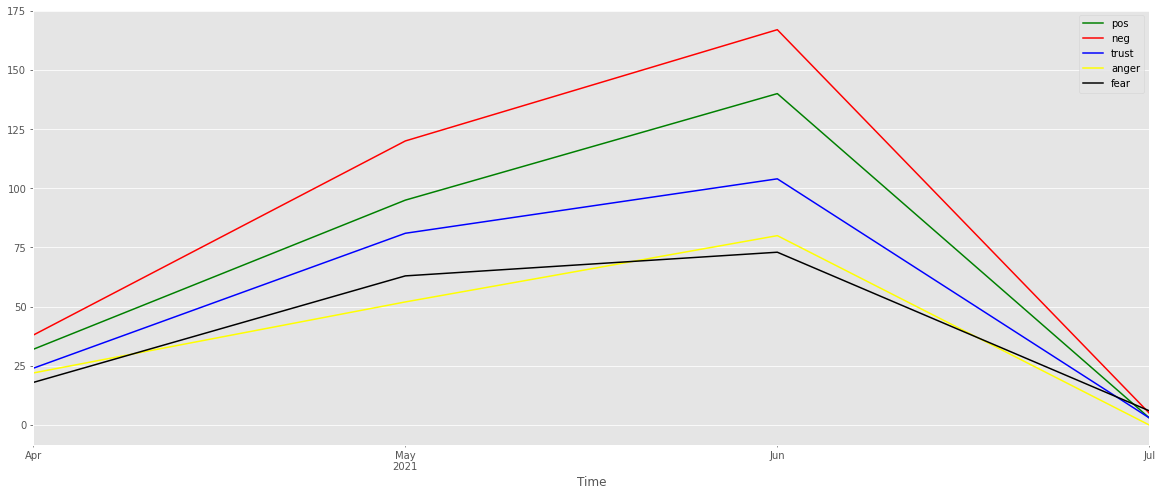

In [25]:
ax = df['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'green',label='pos', )
df['negative'].resample('M').sum().plot(figsize=(20,4), ax = ax, color = 'red',label= 'neg')
df['trust'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'blue')
df['anger'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'yellow')
df['fear'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'black').legend()

In [26]:
#Resamle Time Series from daily to weekly (7d)
df_new = df.resample('7d').sum()

df_new

,year,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Time,,,,,,,,,,,,
2021-04-15,30315,276,10,14,4,6,3,12,3,6,16,7
2021-04-22,34357,424,11,16,2,4,2,12,2,9,22,10
2021-04-29,24252,101,3,10,4,1,2,8,6,2,6,2
2021-05-06,68714,303,21,27,10,9,7,29,16,9,39,22
2021-05-13,26273,196,8,19,3,5,3,9,6,6,16,9
2021-05-20,68714,779,11,28,3,11,5,23,11,12,38,21
2021-05-27,48504,517,14,18,7,6,6,16,15,6,27,15
2021-06-03,88924,310,26,44,8,10,10,35,28,14,60,20
2021-06-10,141470,965,38,55,10,17,15,42,18,30,76,32


In [29]:
df_new.to_csv('/content/gdrive/My Drive/Colab Notebooks/efsyn_analysis_final.csv' )

In [ ]:
ax = df_daily['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'green',label='pos', )
df_daily['negative'].resample('M').sum().plot(figsize=(20,4), ax = ax, color = 'red',label= 'neg')
df_daily['trust'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'blue')
df_daily['anger'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'yellow')
df_daily['fear'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'black').legend()